# Project 2 #

In [1]:
import numpy as np
from numpy import linalg as la
from __future__ import division

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

In [22]:
def set_matrix(nodes=5, D=1./(3.*3.62e-2), sigma_a=0.1532, w=10.):
    n = nodes - 1
    dx = w / n
    offdiag = -D / dx**2
    matrix = np.eye(n) * (sigma_a + 2. * D / dx**2)
    matrix[0][0] = 0.5 * sigma_a + D / dx**2
    for i in range(n)[1:-1]:
        matrix[i][i-1] = offdiag
        matrix[i][i+1] = offdiag
    matrix[0][1] = offdiag
    matrix[n-1][n-2] = offdiag
    
    nusig = 0.157
    S = np.resize(np.array([nusig]), (n))
    S[0] = S[0] * 0.5
    
    return (matrix, S)

In [37]:
def flux2(nodes, width, sigma_a, sigma_f, sigma_tr, e_max=0.001, max_iterations=1e5):
    D = 1. / (3. * sigma_tr)
    A, S = set_matrix(nodes=nodes, w=width, D=D, sigma_a=sigma_a)
    A = np.linalg.inv(A)
    b = np.ones_like(S) * 1.
    
    k_error = 100
    b_error = 100
    
    num_iterations = 0
    
    k = 1.0
    
    while k_error > e_max or b_error > e_max and num_iterations < max_iterations:
        b = (np.multiply(b, S) / k)

        b_old = b
        k_old = k

        b = A.dot(b)

        m = la.norm(b)
        m_old = la.norm(b_old)
        
        k = k_old * m / m_old

        k_error = abs(k - k_old) / k

        b_error = np.sum(abs(b - b_old))

        num_iterations += 1
        
        b = b / m
        
        # print("b error: {0}".format(b_error))
        print("k error: {0}".format(k_error))
        
        #print num_iterations, b, k
    return np.append(b, 0), k

k error: 0.880647634606
k error: 0.881089843072
k error: 0.881516878407
k error: 0.881929179829
k error: 0.88232718484
k error: 0.882711327617
k error: 0.88308203764
k error: 0.883439738533
k error: 0.883784847096
k error: 0.884117772502
k error: 0.884438915637
k error: 0.884748668582
k error: 0.885047414199
k error: 0.88533552582
k error: 0.885613367022
k error: 0.885881291484
k error: 0.8861396429
k error: 0.886388754955
k error: 0.886628951348
k error: 0.886860545855
k error: 0.887083842431
k error: 0.887299135333
k error: 0.887506709279
k error: 0.887706839617
k error: 0.887899792516
k error: 0.888085825172
k error: 0.888265186013
k error: 0.888438114927
k error: 0.888604843488
k error: 0.888765595181
k error: 0.888920585639
k error: 0.88907002287
k error: 0.889214107499
k error: 0.889353032986
k error: 0.889486985865
k error: 0.889616145964
k error: 0.889740686625
k error: 0.889860774928
k error: 0.889976571896
k error: 0.890088232709
k error: 0.890195906902
k error: 0.89029973856

/home/jrpl/anaconda2/envs/nuc/lib/python2.7/site-packages/ipykernel/__main__.py:25: RuntimeWarning: divide by zero encountered in double_scalars
/home/jrpl/anaconda2/envs/nuc/lib/python2.7/site-packages/ipykernel/__main__.py:27: RuntimeWarning: invalid value encountered in double_scalars


k error: 0.848871480741
k error: 0.848876325959
k error: 0.848880660326
k error: 0.848884540152
k error: 0.848888015266
k error: 0.848891129815
k error: 0.848893922954
k error: 0.848896429437
k error: 0.848898680135
k error: 0.848900702485
k error: 0.848902520885
k error: 0.84890415704
k error: 0.848905630267
k error: 0.848906957762
k error: 0.848908154844
k error: 0.848909235156
k error: 0.848910210862
k error: 0.848911092802
k error: 0.848911890647
k error: 0.848912613024
k error: 0.848913267632
k error: 0.848913861345
k error: 0.848914400304
k error: 0.848914889996
k error: 0.848915335326
k error: 0.848915740683
k error: 0.848916109991
k error: 0.848916446767
k error: 0.848916754159
k error: 0.84891703499
k error: 0.848917291792
k error: 0.848917526836
k error: 0.848917742161
k error: 0.848917939602
k error: 0.848918120805
k error: 0.848918287254
k error: 0.848918440284
k error: 0.848918581098
k error: 0.848918710782
k error: 0.848918830315
k error: 0.848918940582
k error: 0.8489190

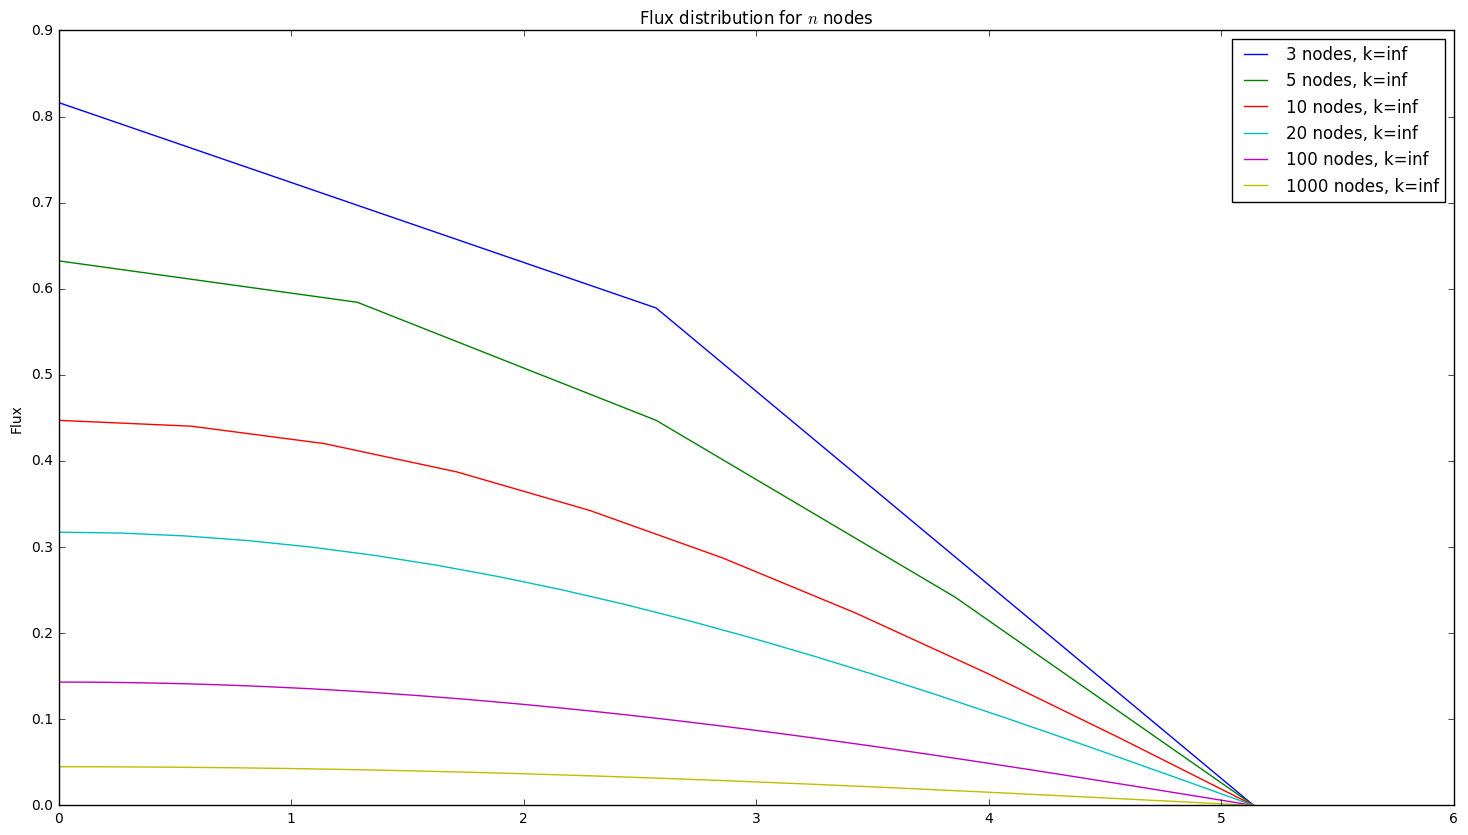

In [38]:
width = 18
height = 10
plt.figure(figsize=(width, height))
for i in [3, 5, 10, 20, 100, 1000]:
    f, k = flux2(i, 138., 0.15, .15, 3.62e-2)
    plt.plot(np.linspace(0, 5.14, i), f, label="{0} nodes, k={1}".format(i, k))
plt.legend(loc="upper right")
plt.title(r'Flux distribution for $n$ nodes')
plt.ylabel("Flux")
plt.show()